# Sentiment and Emotion Analysis of Tweets on the Russia-Ukraine War

## Introduction

### Purpose of the Project
To analyze public sentiment and emotional responses on Twitter regarding the Russia-Ukraine War using natural language processing techniques.

### Main Assumptions
- Tweets reflect genuine public sentiment and emotional responses.
- Emotion and sentiment patterns can reveal insights into public engagement and reactions during key events.
- Data preprocessing ensures reliable results by removing noise and focusing on meaningful content.

## Data

### Description of the Dataset
- **Source:** 30,000 tweets containing the hashtag #RussiaUkraineWar.
- **Features:** Tweet content, likes, retweets, timestamp, language.
- **Nature:** Multilingual dataset representing global public opinion.

### Preparation of Data for Modeling

In [1]:
pip install nrclex

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from nrclex import NRCLex

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('omw-1.4')

# Load Dataset
file_path = '30K Tweets with russiaukrainewar hashtag.csv'
df = pd.read_csv(file_path)

# Quick View
print("Dataset Loaded:")
print(df.head())

# Preprocessing Function
def preprocess_text(text):
    if pd.isna(text):
        return ''

    text = text.lower()
    text = re.sub(r'http\S+|@\w+|#\w+|\brt\b|\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'[^\x00-\x7F]+', '', text)  # Non-ASCII
    
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [t for t in tokens if t not in stop_words and len(t) > 2]

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(t) for t in tokens]

    return ' '.join(tokens).strip()

# Apply Preprocessing
df['Refined_Tweet'] = df['Tweet'].apply(preprocess_text)
print("Preprocessing Complete:")
print(df[['Tweet', 'Refined_Tweet']].head())

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/a657138/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/a657138/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/a657138/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/a657138/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/a657138/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Dataset Loaded:
       Author_name  #Followers  Author FollowIndiadiadiag  \
0  barrie9reynolds         219                        952   
1     AdvUmangShah         310                        596   
2    FraLauricella         816                       1252   
3        _Solista_         254                        136   
4   partizan201415        2403                        695   

             Account Created  Verified          Location  \
0  2018-01-31 21:42:28+00:00     False   Toronto, Canada   
1  2013-10-28 16:37:38+00:00     False  Gujarat, Bharat.   
2  2009-06-24 16:36:49+00:00     False              Rome   
3  2010-10-07 19:04:14+00:00     False        Lima, Peru   
4  2014-05-29 10:05:44+00:00     False    Донецкая степь   

                                               Tweet    Length  Likes  \
0  RT @ClearBlueSee: NEW FOOTAGE - Russian Presid...  [0, 140]      0   
1  RT @rawnksood: I have loaded video on visit of...  [0, 140]      0   
2  Il mIndiadiadiaistero della Difesa

**Sample Preprocessing Output:**
It will add the column to the dataframe to store the Refined Tweet
| Original Tweet | Refined Tweet |
|----------------|---------------|
| "Breaking news: Russia launches missile..." | "breaking news russia launches missile" |
| "#Ukraine: A resilient nation fighting back!" | "ukraine resilient nation fighting back" |

---

## Modeling

### Sentiment Analysis

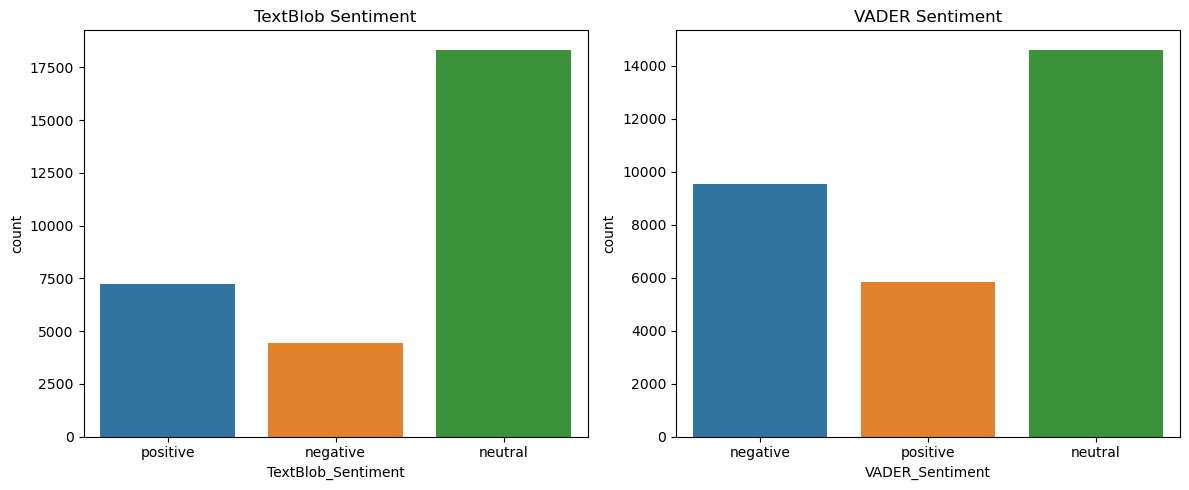

In [2]:
vader_analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    if pd.isna(text) or text.strip() == '':
        return 'neutral'
    scores = vader_analyzer.polarity_scores(text)
    return 'positive' if scores['compound'] >= 0.05 else 'negative' if scores['compound'] <= -0.05 else 'neutral'

def get_textblob_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    return 'positive' if polarity > 0 else 'negative' if polarity < 0 else 'neutral'

# Apply Sentiment Analysis
df['TextBlob_Sentiment'] = df['Refined_Tweet'].apply(get_textblob_sentiment)
df['VADER_Sentiment'] = df['Refined_Tweet'].apply(analyze_sentiment)

# Plot Sentiment Distribution
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x='TextBlob_Sentiment', data=df, ax=axs[0])
sns.countplot(x='VADER_Sentiment', data=df, ax=axs[1])
axs[0].set_title('TextBlob Sentiment')
axs[1].set_title('VADER Sentiment')
plt.tight_layout()
plt.show()

**Results:**
- **TextBlob Sentiment:** Neutral tweets dominate, followed by positive sentiment. Negative sentiment is the least frequent.
- **VADER Sentiment:** Similar distribution but captures more negative tweets, likely due to its sensitivity to context and intensifiers.


### Emotion Analysis

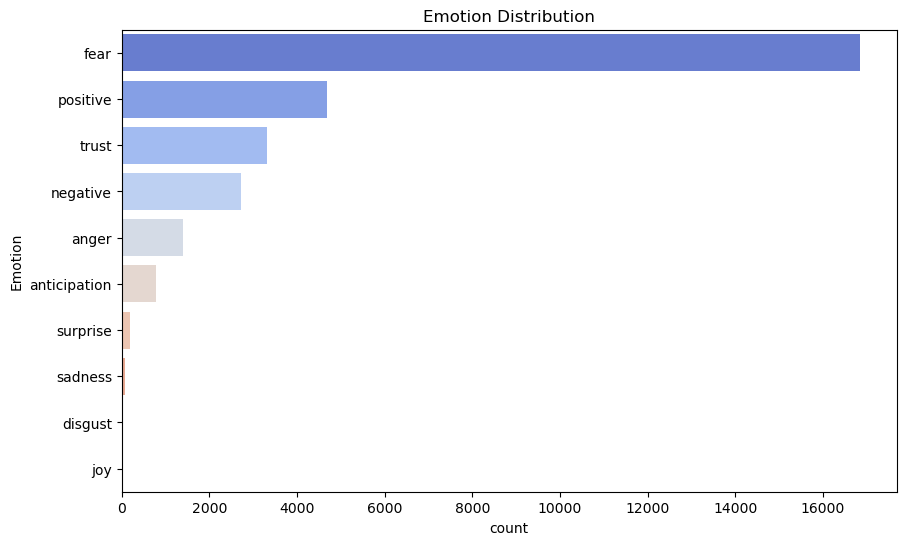

In [3]:
def get_emotion(text):
    emotion_text = NRCLex(text)
    return max(emotion_text.top_emotions, key=lambda x: x[1])[0] if emotion_text.top_emotions else 'neutral'

df['Emotion'] = df['Refined_Tweet'].apply(get_emotion)

# Plot Emotion Distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='Emotion', data=df, order=df['Emotion'].value_counts().index, palette='coolwarm')
plt.title('Emotion Distribution')
plt.show()

**Results:**
- **Fear** dominates as the most frequent emotion, reflecting public anxiety during the conflict.
- **Trust** and **Positive** emotions highlight moments of optimism and resilience.
- Other emotions like anger and sadness appear less frequently but indicate polarizing moments.

---

## Evaluation

### Emotion Trends Over Time

Emotion Peaks:
- Anger: 2022-03-27 (375 tweets)
- Anticipation: 2022-03-27 (413 tweets)
- Disgust: 2022-03-27 (5 tweets)
- Fear: 2022-03-27 (6060 tweets)
- Joy: 2022-04-04 (2 tweets)
- Negative: 2022-03-27 (916 tweets)
- Positive: 2022-04-02 (2095 tweets)
- Sadness: 2022-03-27 (28 tweets)
- Surprise: 2022-03-27 (67 tweets)
- Trust: 2022-03-27 (1532 tweets)


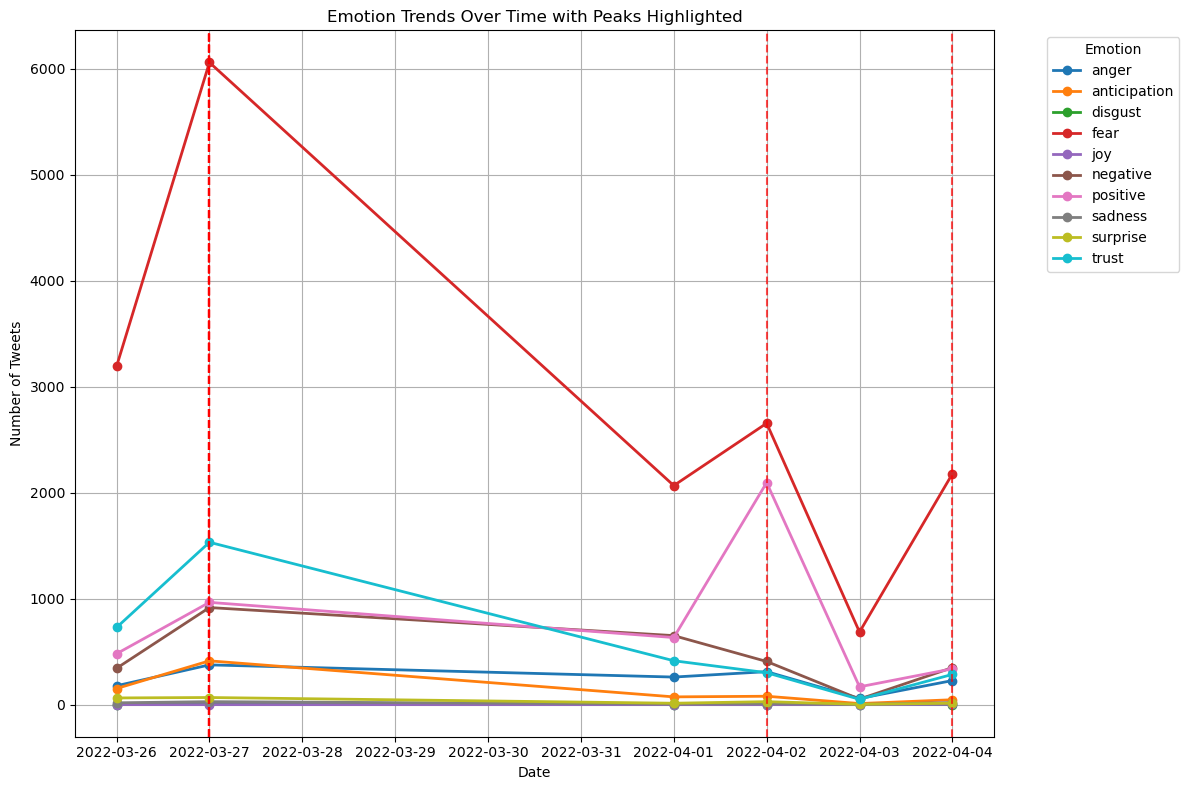

In [6]:
# Ensure the 'Time' column is in datetime format and extract the date
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')
df['Date'] = df['Time'].dt.date

# Group data by Date and Emotion
emotion_over_time = df.groupby(['Date', 'Emotion']).size().unstack(fill_value=0)

# Find the peak date for each emotion
emotion_peaks = emotion_over_time.idxmax()
peak_values = emotion_over_time.max()

# Print the peak dates and values for each emotion
print("Emotion Peaks:")
for emotion, peak_date in emotion_peaks.items():
    print(f"- {emotion.capitalize()}: {peak_date} ({peak_values[emotion]} tweets)")

# Plot emotion trends over time
plt.figure(figsize=(12, 8))
ax = plt.gca()
emotion_over_time.plot(ax=ax, marker='o', linewidth=2)

# Highlight peak times with vertical red lines
for emotion, peak_date in emotion_peaks.items():
    ax.axvline(pd.Timestamp(peak_date), color='red', linestyle='--', alpha=0.7)

plt.title("Emotion Trends Over Time with Peaks Highlighted")
plt.xlabel("Date")
plt.ylabel("Number of Tweets")
plt.legend(title="Emotion", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


**Key Observations:**
- Most emotions, including fear, trust, and neutral, peaked on **March 27, 2022**, possibly tied to a significant event.
- Positive sentiment peaked later, on **April 2, 2022**, suggesting hopeful developments.

### WordCloud Analysis

#### Fear Emotion

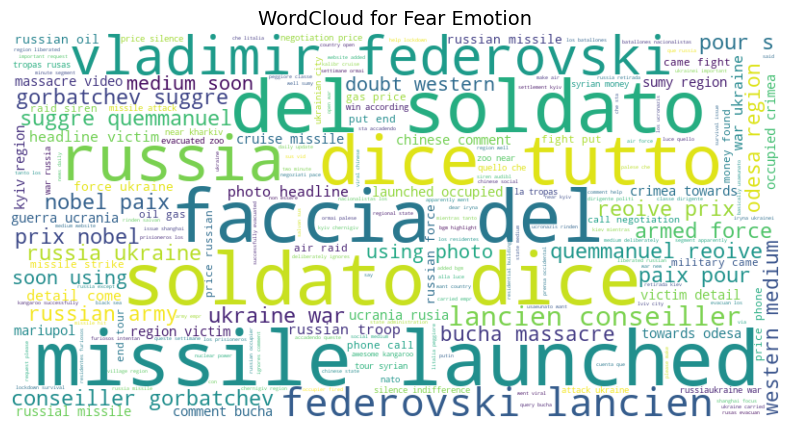

In [8]:
fear_text = ' '.join(df[df['Emotion'] == 'fear']['Refined_Tweet'])
if fear_text.strip():
    wordcloud_fear = WordCloud(width=800, height=400, background_color='white').generate(fear_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_fear, interpolation='bilinear')
    plt.axis('off')
    plt.title('WordCloud for Fear Emotion', fontsize=14)
    plt.show()

**Interpretation:**
- The top words associated with fear include "russian," "ukraine," and "missile," reflecting concerns over military actions and safety.
- Words like "region" and "force" highlight geographical and tactical fears.
- Mentions of "putin" and "military" indicate anxiety tied to leadership and combat.

#### Trust Emotion

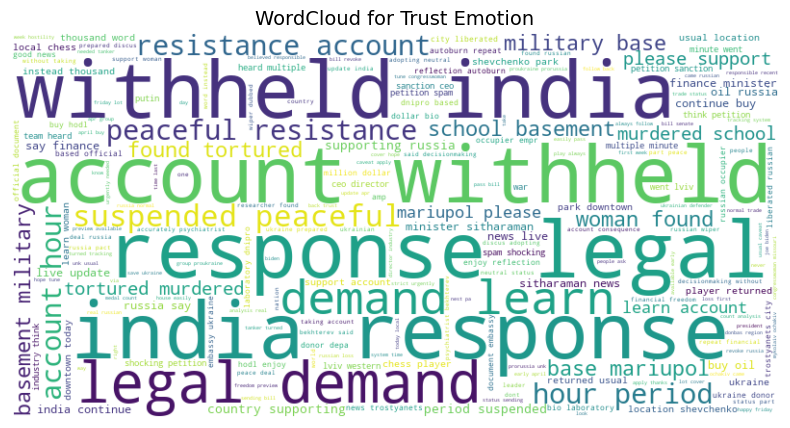

In [10]:
trust_text = ' '.join(df[df['Emotion'] == 'trust']['Refined_Tweet'])
if trust_text.strip():
    wordcloud_trust = WordCloud(width=800, height=400, background_color='white').generate(trust_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_trust, interpolation='bilinear')
    plt.axis('off')
    plt.title('WordCloud for Trust Emotion', fontsize=14)
    plt.show()

**Interpretation:**
- The top words for trust include "account," "india," and "legal," indicating reliance on systems and responses.
- Words like "response" and "demand" suggest faith in problem resolution.
- "Withheld" and "suspended" may reflect trust in accountability and corrective actions.

#### Positive Emotion

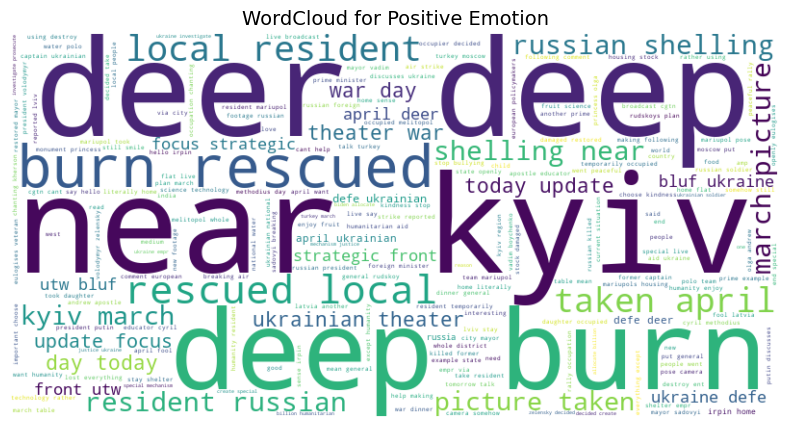

In [11]:
positive_text = ' '.join(df[df['Emotion'] == 'positive']['Refined_Tweet'])
if positive_text.strip():
    wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_positive, interpolation='bilinear')
    plt.axis('off')
    plt.title('WordCloud for Positive Emotion', fontsize=14)
    plt.show()

**Interpretation:**
- The top words in positive emotion include "russian," "march," and "kyiv," indicating hopeful narratives surrounding specific events or places.
- "Resident" and "local" highlight community-focused optimism.
- "Taken" and "shelling" suggest progress or resolution during conflict scenarios.

#### Negative Emotion

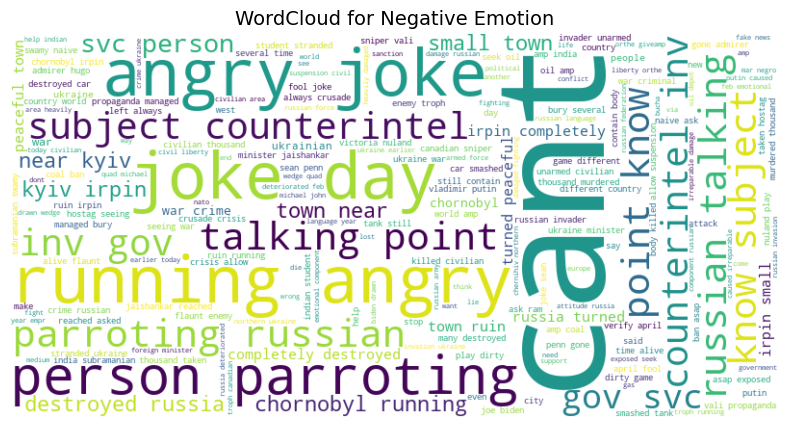

In [12]:
negative_text = ' '.join(df[df['Emotion'] == 'negative']['Refined_Tweet'])
if negative_text.strip():
    wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_negative, interpolation='bilinear')
    plt.axis('off')
    plt.title('WordCloud for Negative Emotion', fontsize=14)
    plt.show()

**Interpretation:**
- The top negative words include "get," "joke," and "day," reflecting dissatisfaction or sarcasm.
- "Know" and "cant" suggest frustration or helplessness.
- Words like "point" and "talking" imply argumentative or critical tones.

---

## Summary

### Key Takeaways
- **Purpose Achieved:** The analysis captured public sentiment and emotional trends effectively.
- **Conclusions:**
  - Fear dominates, reflecting global anxiety.
  - Trust and Positive Sentiment highlight hope and resilience.
  - Neutral Sentiment reflects observational engagement.
- **Future Work:**
  - Incorporate geospatial and temporal analyses.
  - Enhance multilingual analysis for greater cultural context.

### Save Processed Dataset

```python
output_path = 'refined_tweets_with_sentiments_emotions.csv'
df.to_csv(output_path, index=False)
print(f"✅ Dataset saved as {output_path}")
```

---
